In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

In [2]:
cancer_dataset = load_breast_cancer()

In [3]:
print("Ключи cancer_datcanceraset: \n{}".format(cancer_dataset.keys()))

Ключи cancer_datcanceraset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print(cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
print("Названия ответов: {}".format(cancer_dataset['target_names']))

Названия ответов: ['malignant' 'benign']


In [8]:
print("Названия признаков: \n{}".format(cancer_dataset['feature_names']))

Названия признаков: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
print("Первые 5 строк массива: \n{}".format(cancer_dataset['data'][:150]))

Первые 5 строк массива: 
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.495e+01 1.877e+01 9.784e+01 ... 8.405e-02 2.852e-01 9.218e-02]
 [1.444e+01 1.518e+01 9.397e+01 ... 1.599e-01 2.691e-01 7.683e-02]
 [1.374e+01 1.791e+01 8.812e+01 ... 6.019e-02 2.350e-01 7.014e-02]]


In [12]:
print("Тип массива target: {}".format(type(cancer_dataset['target'])))
print("Форма массива target: {}".format(cancer_dataset['target'].shape))
print("Ответы:\n{}".format(cancer_dataset['target']))

Тип массива target: <class 'numpy.ndarray'>
Форма массива target: (569,)
Ответы:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 

In [15]:
X = cancer_dataset.data 
y = cancer_dataset.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
k = 5  
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
print("Форма массиа X_train: {}".format(X_train.shape))
print("Форма массиа y_train: {}".format(y_train.shape))
print("Форма массиа X_test: {}".format(X_test.shape))
print("Форма массиа y_test: {}".format(y_test.shape))

Форма массиа X_train: (398, 30)
Форма массиа y_train: (398,)
Форма массиа X_test: (171, 30)
Форма массиа y_test: (171,)


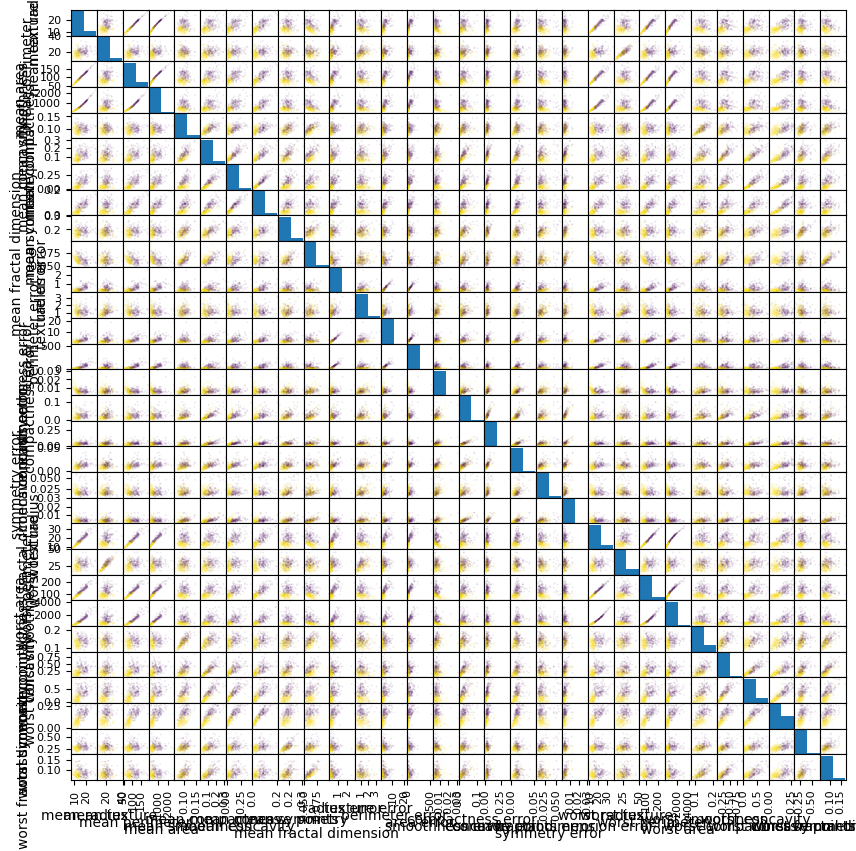

In [23]:
cancer_dataframe = pd.DataFrame(X_train,columns=cancer_dataset.feature_names)
grr = pd.plotting.scatter_matrix(cancer_dataframe,c=y_train,figsize=(10,10),marker='.',hist_kwds={'bins':2},s=6,alpha=.1)

In [22]:
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


Набор данных о раке молочной железы содержит информацию о характеристиках образцов молочной железы и их классификации как доброкачественных (нераковых) или злокачественных (раковых). Мы использовали алгоритм k-ближайших соседей для построения модели классификации. После обучения модели и её оценки на тестовых данных, мы получили точность около 96%, что говорит о высокой способности модели правильно классифицировать образцы молочной железы.